# Rudimentary Analysis of Bluesky Data

In [ ]:
# Import necessary libraries
import numpy as np, pandas as pd

In [98]:
jp = pd.read_csv('csv_cleaned/jp_sqlite_Posts_202504092357.csv')
kr = pd.read_csv('csv_cleaned/kr_sqlite_Posts_202504101218.csv')
sp = pd.read_csv('csv_cleaned/sp_sqlite_Posts_202504101221.csv')

In [99]:
jp['language'] = 'jp'
kr['language'] = 'kr'
sp['language'] = 'sp'

In [100]:
import unicodedata # necessary library

def count_substring(text, substring, normalization='NFC'):
    # Normalize both the text and substring to handle Unicode variations
    normalized_text = unicodedata.normalize(normalization, text)
    normalized_substring = unicodedata.normalize(normalization, substring)
    
    # Count occurrences of the normalized substring
    return normalized_text.count(normalized_substring)

def dem_count(x, dem_use, lang):
    demonstratives = {'jp' : {'proximal' : 'これ', 'medial': 'それ', 'distal': 'あれ'},
                      'kr' : {'proximal' : '이', 'medial': '그', 'distal': '저'},
                      'sp' : {'proximal' : ['esto', 'esta'], 'medial': ['ese', 'esos', 'esa'],
                              'distal': ['aquel', 'aquella', 'aquellos']}}
    if lang == 'sp': 
        count = 0
        for s in demonstratives[lang][dem_use]:
            count += sum(1 for i in range(len(x) - len(s) + 1) if x[i:i + len(s)] == s)
        return count
    else: 
        count = count_substring(x, demonstratives[lang][dem_use])
        return count

In [101]:
dem_uses = ['proximal', 'medial', 'distal']
langs = ['jp', 'kr', 'sp']

for q in dem_uses:
    jp[q] = 0
    sp[q] = 0
    kr[q] = 0

for q in dem_uses:
    jp[q] = jp['text'].apply(dem_count, args=(q, 'jp'))
    sp[q] = sp['text'].apply(dem_count, args=(q, 'sp'))
    kr[q] = kr['text'].apply(dem_count, args=(q, 'kr'))

In [102]:
df = pd.concat(objs=[jp, kr, sp])
df

,url,text,Bracket,language,proximal,medial,distal
0,https://bsky.app/profile/kohara.bsky.social/po...,ご依頼で色紙を描かせていただきました！\n\n満1歳の記念ということで…\n初節句の時の衣装...,0,jp,1,0,0
1,https://bsky.app/profile/akatsuking926.bsky.so...,青空でお見かけしたクラフテリアさん( @crafterior.bsky.social )\n...,1,jp,1,0,0
2,https://bsky.app/profile/akatsuking926.bsky.so...,正直、じーぴーてーに二次創作の内容のネタ出しさせて原稿描きまーす!ってしてるのとか私は快く思...,1,jp,1,0,0
3,https://bsky.app/profile/akatsuking926.bsky.so...,(´・ω・｀)そうですよね...なんというか自分が使うものがどういうものなのか知ってから使っ...,1,jp,1,0,0
4,https://bsky.app/profile/akatsuking926.bsky.so...,DLSSを搭載するから規制派さんはSwitch2できませんねーって言ってるらしくて( ՞ਊ ...,1,jp,0,0,1
...,...,...,...,...,...,...,...
217,https://bsky.app/profile/xandasbolas8.bsky.soc...,"Sí, sí, ese video es buenísimo",2,sp,0,1,0
218,https://bsky.app/profile/xandasbolas8.bsky.soc...,Está Lola Herrera en el 24H y lo de esta mujer...,2,sp,1,0,0
219,https://bsky.app/profile/ehsiug.bsky.social/po...,Un día los de la gorrita del MAGA descubrirán ...,0,sp,0,1,0
220,https://bsky.app/profile/xandasbolas8.bsky.soc...,"Trump va a conseguir unir a China, Corea del S...",2,sp,0,0,0


In [103]:
# import libraries for charting 
import matplotlib.pyplot as plt 

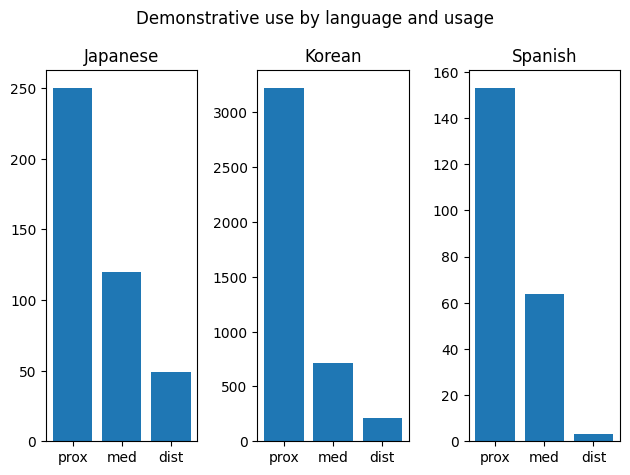

In [104]:
fig, axs = plt.subplots(1, 3, tight_layout=True)

data = {'jp': {'prox': df['proximal'].loc[df['language'] == 'jp'].sum(),
               'med' : df['medial'].loc[df['language']   == 'jp'].sum(),
               'dist': df['distal'].loc[df['language']   == 'jp'].sum()},
        'sp': {'prox': df['proximal'].loc[df['language'] == 'sp'].sum(),
               'med':  df['medial'].loc[df['language']   == 'sp'].sum(),
               'dist': df['distal'].loc[df['language']   == 'sp'].sum()},
        'kr': {'prox': df['proximal'].loc[df['language'] == 'kr'].sum(),
               'med':  df['medial'].loc[df['language']   == 'kr'].sum(),
               'dist': df['distal'].loc[df['language']   == 'kr'].sum()}}

names_jp = list(data['jp'].keys())
names_kr = list(data['kr'].keys())
names_sp = list(data['sp'].keys())

values_jp = list(data['jp'].values())
values_kr = list(data['kr'].values())
values_sp = list(data['sp'].values())

axs[0].bar(names_jp, values_jp)
axs[1].bar(names_kr, values_kr)
axs[2].bar(names_sp, values_sp)

axs[0].set_title('Japanese')
axs[1].set_title('Korean')
axs[2].set_title('Spanish')

fig.suptitle('Demonstrative use by language and usage')
plt.show()

In [105]:
# Export our data to a CSV 
df.to_csv('out.csv', index=False)

# Summary 
All 3 languages showed diminished use of the distal demonstrative, with Japanese using the distal the most, comparatively. 
Spanish, as predicted, used the distal the least out of our data. 

### Possible issues 
Data should be more normalized, we could get more reliable results by randomly sampling the raw data in order to have the same amount of raw data per language. 

Additionally, getting accurate demonstrative counts for Korean could be improved. Currently, my process for counting demonstratives is very rudimentary and relies on substrings. It may be tricky to determine if the characters should be counted or are simply a substring of a different word. This is less of an issue in Spanish and Japanese as the substrings we're searching for are much less likely to compose non-demonstrative forms.